In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_ = df = pd.read_csv('dataset_declassify.csv', encoding='utf-8')
df[['Primary Site', 'CS extension (2004+)', 'CS mets at dx (2004+)']] = df[['Primary Site', 'CS extension (2004+)', 'CS mets at dx (2004+)']].astype(object)

In [3]:
df = df.drop(['Year of diagnosis', 'Sex', 'Race recode'], axis=1)

In [4]:
df = df[['Primary Site',
#          'Histologic Type 2',
         'Grade',
         'CS tumor size (2004+)',
         'CS extension (2004+)',
         'CS mets at dx (2004+)',
         'Age at diagnosis',
         'Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain',
         'Lung - Separate Tumor Nodules - Ipsilateral Lung',
         'Lung - Surgery to Primary Site (1988-2015)',
         'Lung - Surgery to Other Regional/Distant Sites (1998+)',
         'LCCS',
         'Survival months',
         'OS']]

In [5]:
df.columns

Index(['Primary Site', 'Grade', 'CS tumor size (2004+)',
       'CS extension (2004+)', 'CS mets at dx (2004+)', 'Age at diagnosis',
       'Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain',
       'Lung - Separate Tumor Nodules - Ipsilateral Lung',
       'Lung - Surgery to Primary Site (1988-2015)',
       'Lung - Surgery to Other Regional/Distant Sites (1998+)', 'LCCS',
       'Survival months', 'OS'],
      dtype='object')

In [6]:
cols = df.select_dtypes(include=[object]).columns
# cols = ['Sex', 'Histologic Type ICD-O-3', 'Histologic Type 2', 'Grade', 'RX Summ - Scope Reg LN Sur (2003+)', 'LCCS', 'Survival months', 'OS', 'Race recode', 'Marital status at diagnosis', 'Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain', 'Lung - Separate Tumor Nodules - Ipsilateral Lung', 'Lung - Surgery to Primary Site (1988-2015)', 'Lung - Surgery to Other Regional/Distant Sites (1998+)']
print('Columns to apply One-Hot Encoding:\n {}'.format(cols))
for column in cols:
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, prefix_sep='=', dummy_na=False, dtype=np.uint8)], axis=1).drop([column], axis=1)

print(df.info())
df.head()

Columns to apply One-Hot Encoding:
 Index(['Primary Site', 'Grade', 'CS extension (2004+)',
       'CS mets at dx (2004+)',
       'Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain',
       'Lung - Separate Tumor Nodules - Ipsilateral Lung',
       'Lung - Surgery to Primary Site (1988-2015)',
       'Lung - Surgery to Other Regional/Distant Sites (1998+)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16184 entries, 0 to 16183
Data columns (total 91 columns):
CS tumor size (2004+)                                                                                                           16184 non-null int64
Age at diagnosis                                                                                                                16184 non-null int64
LCCS                                                                                                                            16184 non-null int64
Survival months                        

,CS tumor size (2004+),Age at diagnosis,LCCS,Survival months,OS,Primary Site=340,Primary Site=341,Primary Site=342,Primary Site=343,Primary Site=348,...,"Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules, ipsilateral lung, same and different lobe (010+020)","Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules in ipsilateral lung, different lobe","Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules in ipsilateral lung, same lobe",Lung - Surgery to Primary Site (1988-2015)=Lobectomy,Lung - Surgery to Primary Site (1988-2015)=None,Lung - Surgery to Primary Site (1988-2015)=Sublobar,Lung - Surgery to Primary Site (1988-2015)=peumonectomy,Lung - Surgery to Other Regional/Distant Sites (1998+)=None,Lung - Surgery to Other Regional/Distant Sites (1998+)=Surgery To Distant Site Or Nodes,Lung - Surgery to Other Regional/Distant Sites (1998+)=Surgery To Regional Site
0,20,69,0,48,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,20,65,1,13,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,24,65,1,65,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,80,77,1,19,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,40,71,1,57,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
df.to_csv('dataset_declassify_onehot.csv', encoding='utf-8', index=False)

In [8]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis()
# clf.fit(df.drop(['OS', 'LCCS', 'Survival months'], axis=1), df[['LCCS']])

In [9]:
# enc = OneHotEncoder(categories='auto', sparse=False, dtype=np.int)
# onehotlabels = enc.fit_transform(df_)
# enc.categories_

In [10]:
cph_lccs = CoxPHFitter()
cph_lccs.fit(df.drop(["OS"], axis=1), duration_col='Survival months', event_col='LCCS', show_progress=True, step_size=.2)

cph_lccs.print_summary()  # access the results using cph.summary

/Users/lixiang/.local/share/virtualenvs/pulmonary-survival-xlHTsOY_/lib/python3.7/site-packages/lifelines/utils/__init__.py:1059: ConvergenceWarning: "Column(s) ['CS extension (2004+)=745', 'CS extension (2004+)=770', 'CS mets at dx (2004+)=21', 'CS mets at dx (2004+)=32', 'CS mets at dx (2004+)=33', 'CS mets at dx (2004+)=36', 'CS mets at dx (2004+)=53'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails."
  warnings.warn(warning_text, ConvergenceWarning)
/Users/lixiang/.local/share/virtualenvs/pulmonary-survival-xlHTsOY_/lib/python3.7/site-packages/lifelines/utils/__init__.py:1071: ConvergenceWarning: "Column(s) ['CS extension (2004+)=770', 'CS mets at dx (2004+)=33'] have very low variance when conditioned on death event or not. This may harm convergence. This could be a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-lo

Iteration 1: norm_delta = 0.80049, step_size = 0.20000, ll = -26539.06096, seconds_since_start = 0.6
Iteration 2: norm_delta = 4.18799, step_size = 0.20000, ll = -27240.84589, seconds_since_start = 1.1
Iteration 3: norm_delta = 0.20503, step_size = 0.20000, ll = -26019.66467, seconds_since_start = 1.7
Iteration 4: norm_delta = 0.37222, step_size = 0.19600, ll = -25944.57402, seconds_since_start = 2.4
Iteration 5: norm_delta = 0.22502, step_size = 0.19208, ll = -25898.27098, seconds_since_start = 2.9
Iteration 6: norm_delta = 0.14142, step_size = 0.18824, ll = -25868.67757, seconds_since_start = 3.5
Iteration 7: norm_delta = 0.30954, step_size = 0.22589, ll = -25849.32499, seconds_since_start = 4.0
Iteration 8: norm_delta = 0.19351, step_size = 0.22137, ll = -25833.92238, seconds_since_start = 4.6
Iteration 9: norm_delta = 0.10364, step_size = 0.21694, ll = -25824.47706, seconds_since_start = 5.1
Iteration 10: norm_delta = 0.12256, step_size = 0.26033, ll = -25818.59675, seconds_since_s

/Users/lixiang/.local/share/virtualenvs/pulmonary-survival-xlHTsOY_/lib/python3.7/site-packages/lifelines/fitters/coxph_fitter.py:267: ConvergenceWarning: 'Newton-Rhapson failed to converge sufficiently in 50 steps.'
  warnings.warn("Newton-Rhapson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/Users/lixiang/.local/share/virtualenvs/pulmonary-survival-xlHTsOY_/lib/python3.7/site-packages/lifelines/fitters/coxph_fitter.py:391: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(inv(-self._hessian_).diagonal()) / self._norm_std
/Users/lixiang/.local/share/virtualenvs/pulmonary-survival-xlHTsOY_/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/lixiang/.local/share/virtualenvs/pulmonary-survival-xlHTsOY_/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  retu

Likelihood ratio test = 1462.243 on 88 df, p=0.00000


In [11]:
cph_os = CoxPHFitter()
cph_os.fit(
    df.drop(["LCCS"], axis=1),
    duration_col='Survival months',
    event_col='OS',
    show_progress=True,
    step_size=.3,
    strata=[
#         'Histologic Type ICD-O-3=AD-Solid',
        'Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules, ipsilateral lung, same and different lobe (010+020)',
        'Lung - Surgery to Primary Site (1988-2015)=Sublobar',
    ])

cph_os.print_summary()  # access the results using cph.summary

Iteration 1: norm_delta = 0.33077, step_size = 0.30000, ll = -34756.15133, seconds_since_start = 0.7
Iteration 2: norm_delta = 7.17818, step_size = 0.30000, ll = -35715.19150, seconds_since_start = 1.4
Iteration 3: norm_delta = 0.14394, step_size = 0.22500, ll = -34205.58472, seconds_since_start = 2.1
Iteration 4: norm_delta = 2.72876, step_size = 0.26460, ll = -34140.65771, seconds_since_start = 2.8
Iteration 5: norm_delta = 0.68977, step_size = 0.29400, ll = -34092.25361, seconds_since_start = 3.5
Iteration 6: norm_delta = 0.20914, step_size = 0.29400, ll = -34060.00529, seconds_since_start = 4.2
Iteration 7: norm_delta = 0.33145, step_size = 0.36000, ll = -34041.02653, seconds_since_start = 4.9
Iteration 8: norm_delta = 0.06849, step_size = 0.29400, ll = -34027.48052, seconds_since_start = 5.6
Iteration 9: norm_delta = 0.24782, step_size = 0.29400, ll = -34021.21731, seconds_since_start = 6.3
Iteration 10: norm_delta = 0.10134, step_size = 0.29400, ll = -34017.27871, seconds_since_s

In [12]:
print(cph_lccs.score_)
print(cph_os.score_)

cph_lccs.summary[['coef']].append(pd.DataFrame([cph_lccs.score_], index=['Concordance'], columns=['coef'])).to_csv('coef_lccs.csv', encoding='utf-8', index=True)
cph_os.summary[['coef']].append(pd.DataFrame([cph_os.score_], index=['Concordance'], columns=['coef'])).to_csv('coef_os.csv', encoding='utf-8', index=True)

# cph_os.plot()

0.6984373196140256
0.6625357450677566


In [13]:
df_clean = df.drop(['OS', 'LCCS', 'Survival months'], axis=1)
# cph_lccs.predict_partial_hazard(df_clean)

df_clean_1 = df_clean.iloc[[0, 1]]

results_1 = cph_os.predict_survival_function(df_clean_1)

In [14]:
results_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 71
Data columns (total 2 columns):
1    72 non-null float64
0    72 non-null float64
dtypes: float64(2)
memory usage: 4.2+ KB


In [15]:
results_1.head()

,1,0
0,0.996814,0.993990
1,0.990767,0.989473
2,0.983324,0.982674
3,0.976896,0.976552
4,0.971361,0.967899


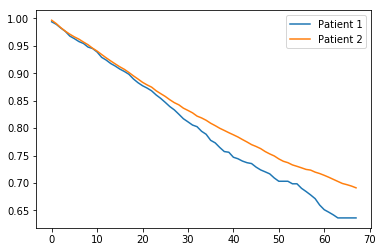

In [16]:
plt.plot(range(68), results_1[[0]].values[:68])
plt.plot(range(68), results_1[[1]].values[:68])
plt.legend(['Patient 1', 'Patient 2'])

In [17]:
cph_lccs.baseline_hazard_.iloc[:69].to_csv('baseline_lccs.csv', encoding='utf-8', index=True)
cph_os.baseline_hazard_.iloc[:69].to_csv('baseline_os.csv', encoding='utf-8', index=True)

In [18]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 88 columns):
CS tumor size (2004+)                                                                                                           2 non-null int64
Age at diagnosis                                                                                                                2 non-null int64
Primary Site=340                                                                                                                2 non-null uint8
Primary Site=341                                                                                                                2 non-null uint8
Primary Site=342                                                                                                                2 non-null uint8
Primary Site=343                                                                                                                2 non-null uint8
Primary Site=348             

In [19]:
def plot_variable_loglogs(variable='Sex', data=df.drop(['LCCS'], axis=1), duration='Survival months', event_observed='OS'):

    data_types = data[variable].value_counts().keys()
    
    types = [
        data.loc[data[variable] == x] for x in data_types
    ]

    fig, axes = plt.subplots()

    for x in types:
        kmf = KaplanMeierFitter()
        kmf.fit(x[duration], event_observed=x[event_observed])
        kmf.plot_loglogs(ax=axes)

    axes.legend(data_types)

    plt.show()

Primary Site=340


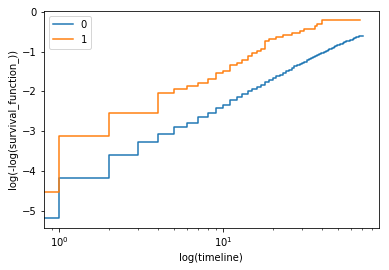

Primary Site=341


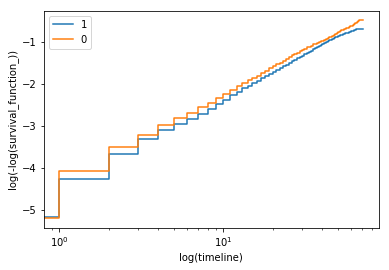

Primary Site=342


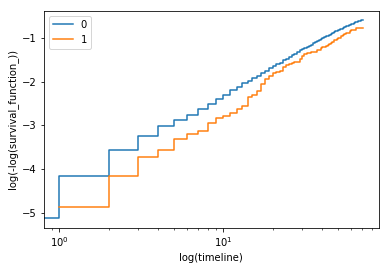

Primary Site=343


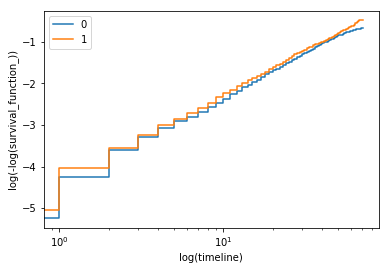

Primary Site=348


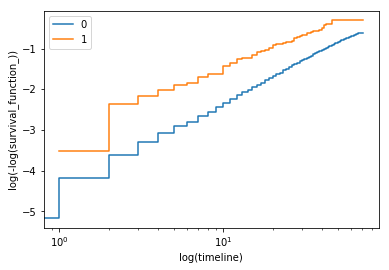

Primary Site=349


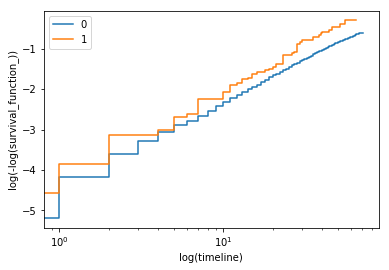

Grade=Moderately


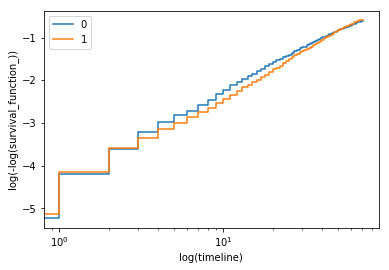

Grade=Poor


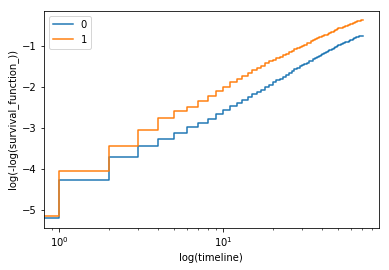

Grade=undefined


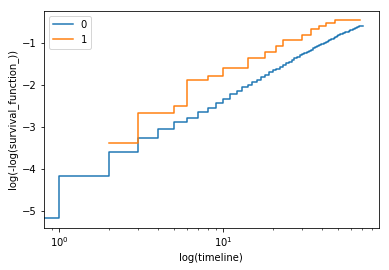

Grade=well


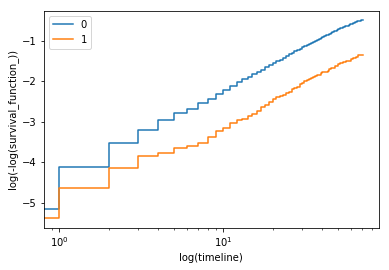

CS extension (2004+)=100


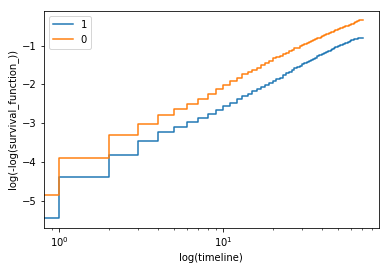

CS extension (2004+)=110


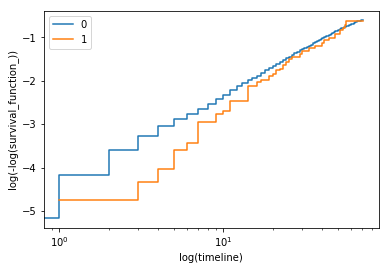

CS extension (2004+)=115


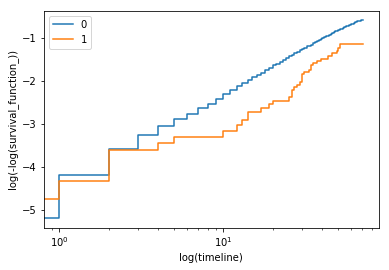

CS extension (2004+)=120


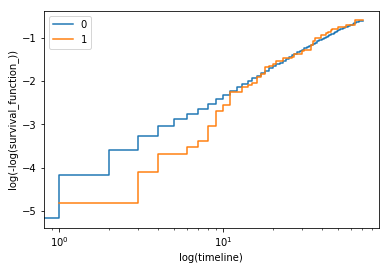

CS extension (2004+)=125


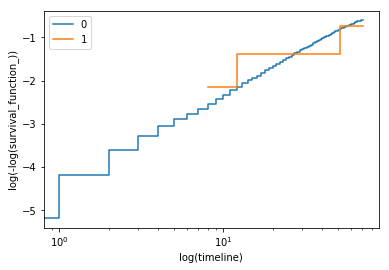

CS extension (2004+)=200


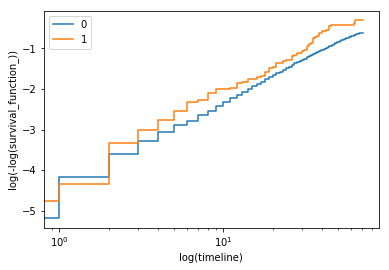

CS extension (2004+)=210


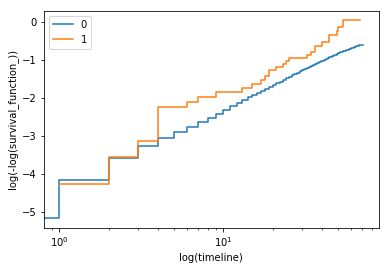

CS extension (2004+)=220


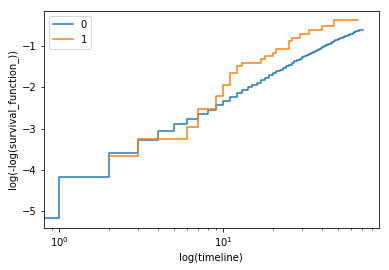

CS extension (2004+)=230


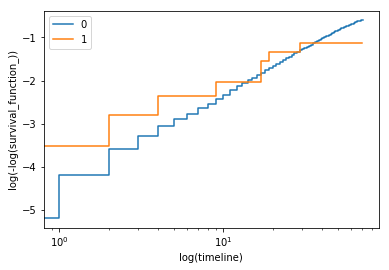

CS extension (2004+)=300


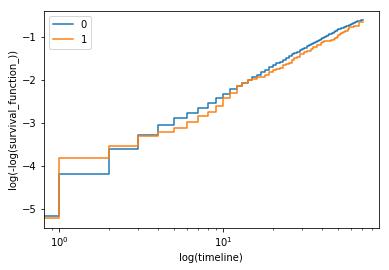

CS extension (2004+)=400


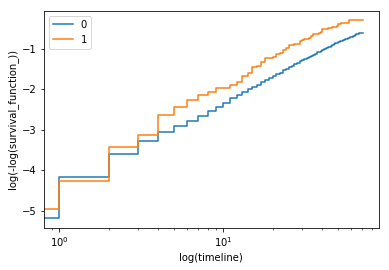

CS extension (2004+)=410


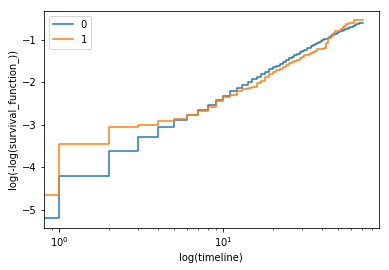

CS extension (2004+)=420


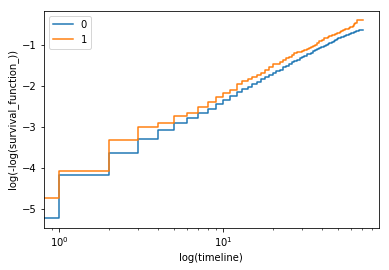

CS extension (2004+)=430


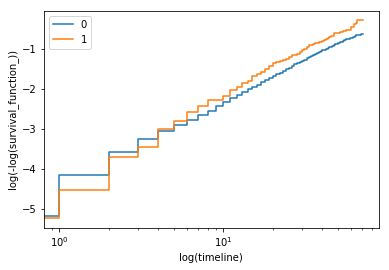

CS extension (2004+)=440


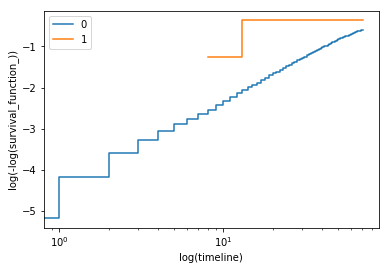

CS extension (2004+)=455


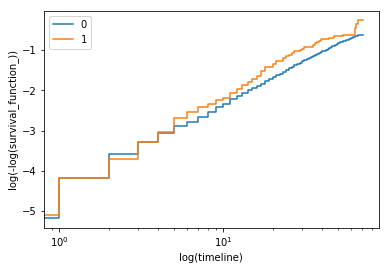

CS extension (2004+)=460


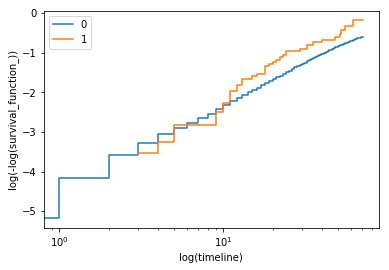

CS extension (2004+)=465


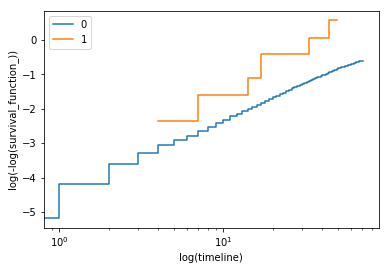

CS extension (2004+)=500


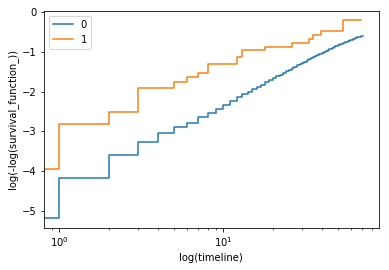

CS extension (2004+)=520


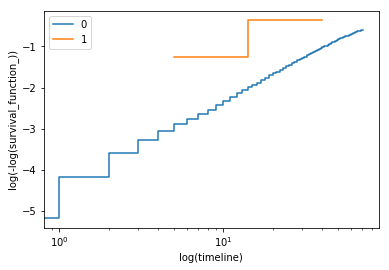

CS extension (2004+)=540


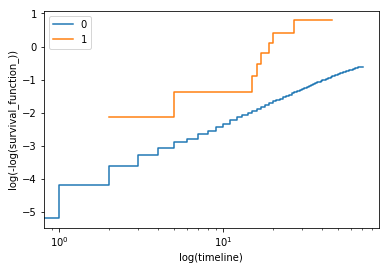

CS extension (2004+)=550


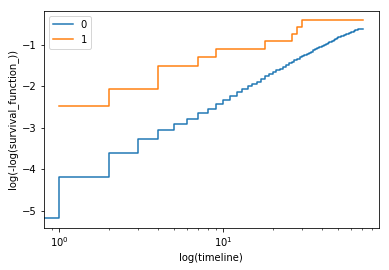

CS extension (2004+)=560


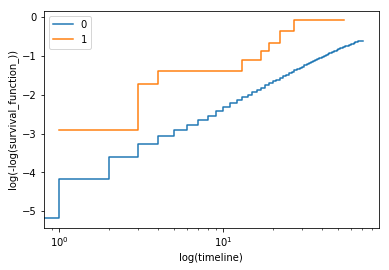

CS extension (2004+)=570


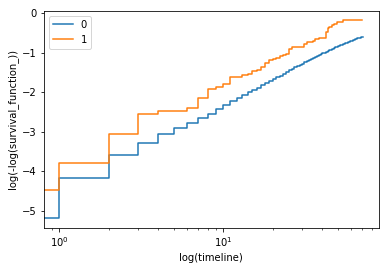

CS extension (2004+)=590


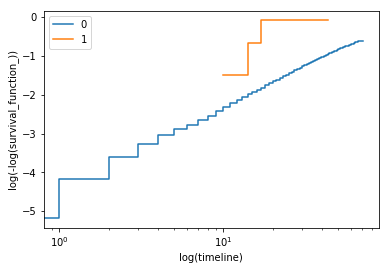

CS extension (2004+)=600


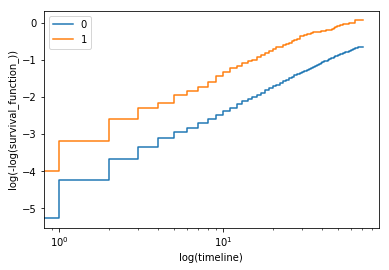

CS extension (2004+)=610


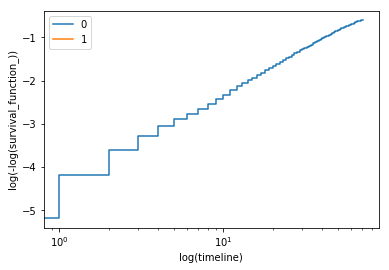

CS extension (2004+)=680


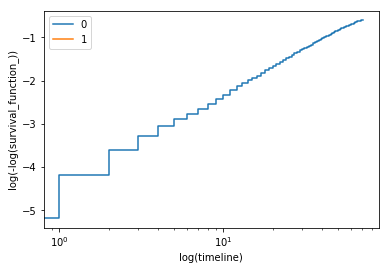

CS extension (2004+)=700


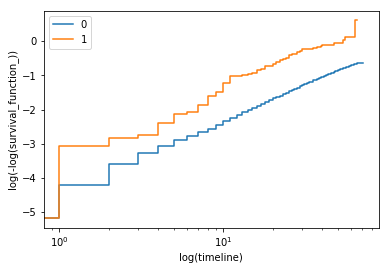

CS extension (2004+)=705


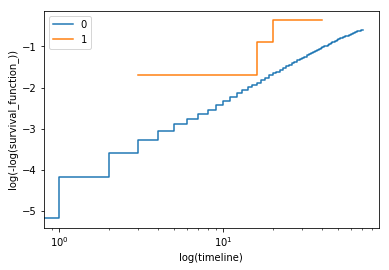

CS extension (2004+)=710


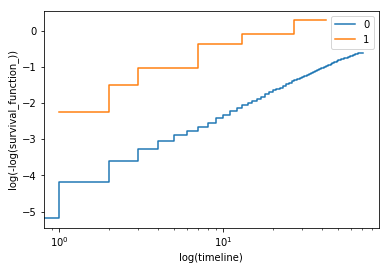

CS extension (2004+)=730


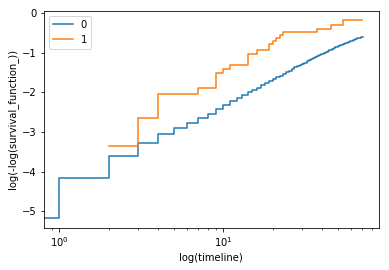

CS extension (2004+)=740


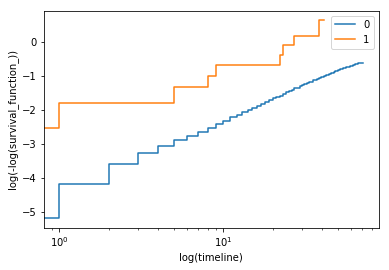

CS extension (2004+)=745


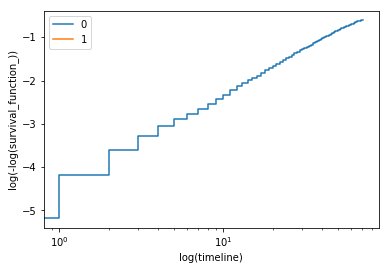

CS extension (2004+)=750


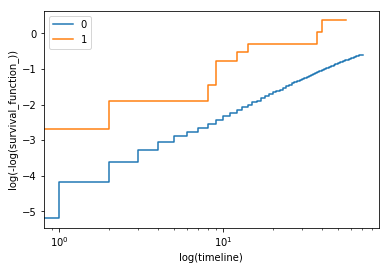

CS extension (2004+)=770


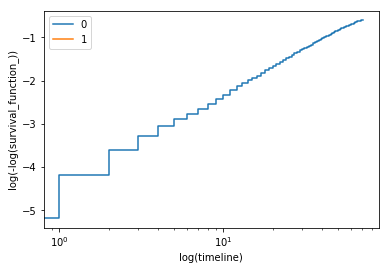

CS extension (2004+)=785


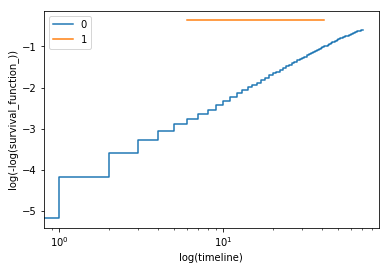

CS mets at dx (2004+)=0


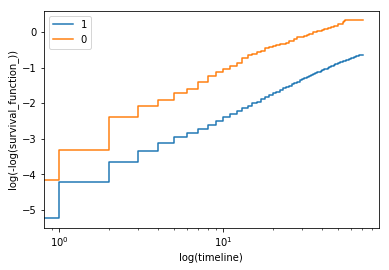

CS mets at dx (2004+)=15


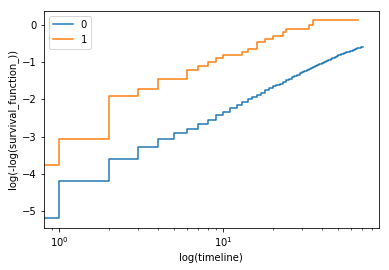

CS mets at dx (2004+)=16


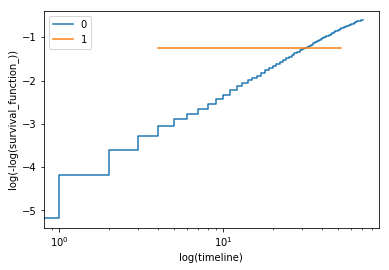

CS mets at dx (2004+)=17


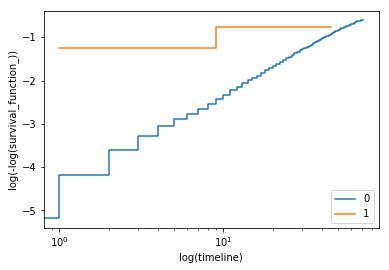

CS mets at dx (2004+)=18


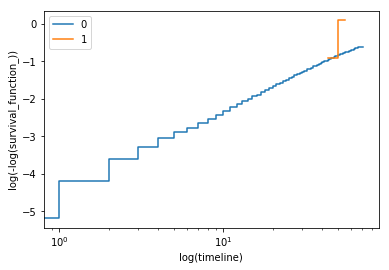

CS mets at dx (2004+)=20


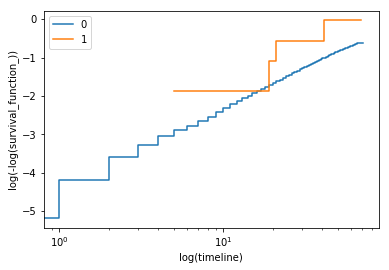

CS mets at dx (2004+)=21


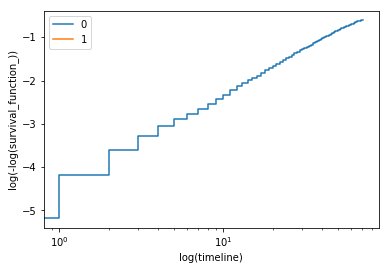

CS mets at dx (2004+)=23


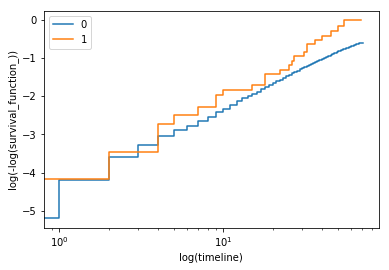

CS mets at dx (2004+)=24


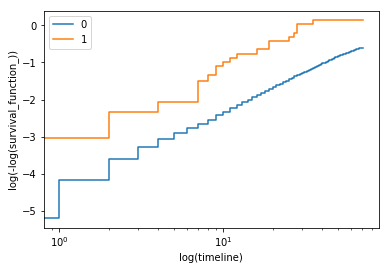

CS mets at dx (2004+)=25


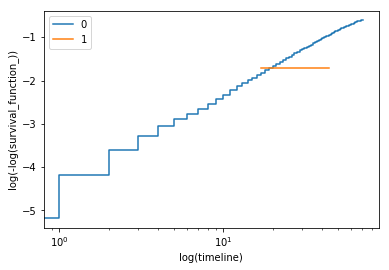

CS mets at dx (2004+)=26


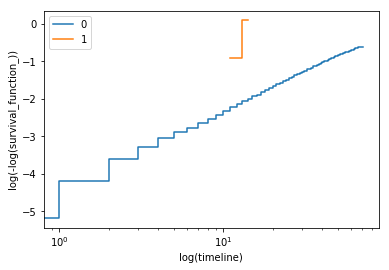

CS mets at dx (2004+)=30


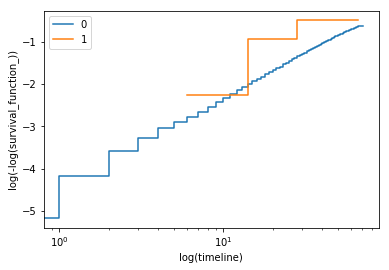

CS mets at dx (2004+)=32


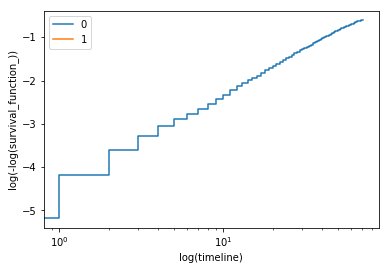

CS mets at dx (2004+)=33


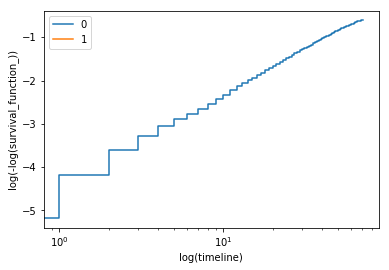

CS mets at dx (2004+)=36


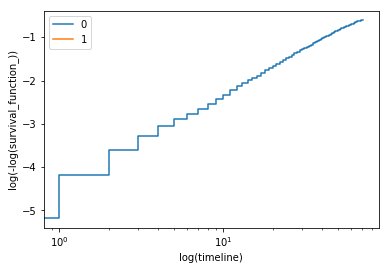

CS mets at dx (2004+)=37


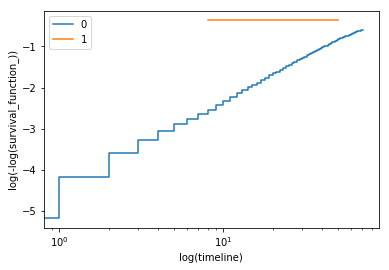

CS mets at dx (2004+)=40


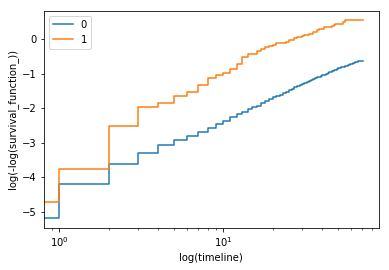

CS mets at dx (2004+)=41


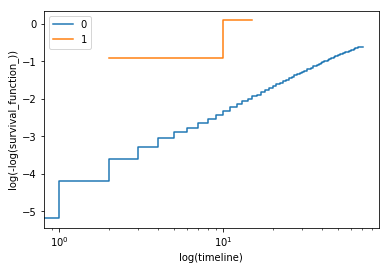

CS mets at dx (2004+)=42


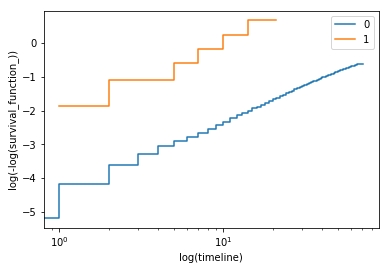

CS mets at dx (2004+)=43


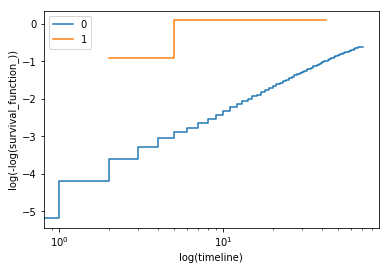

CS mets at dx (2004+)=51


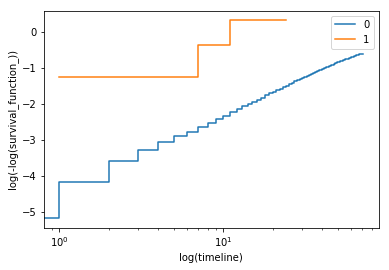

CS mets at dx (2004+)=52


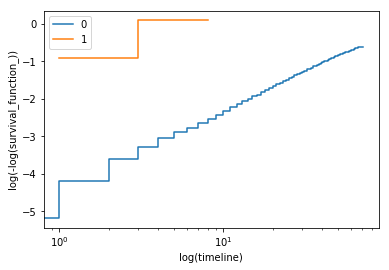

CS mets at dx (2004+)=53


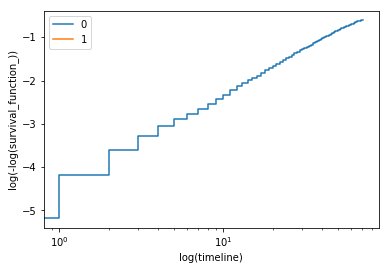

CS mets at dx (2004+)=70


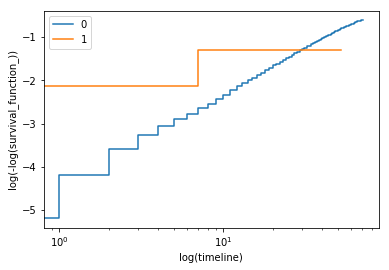

Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain=PL0


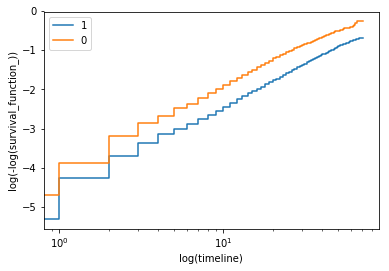

Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain=PL1


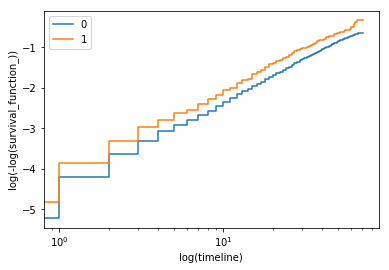

Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain=PL2


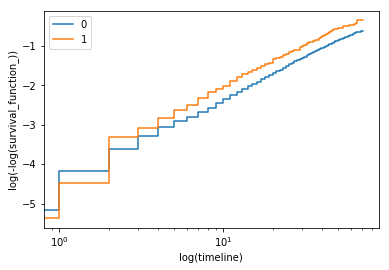

Lung - Pleural/Elastic Layer Invasion (PL) by H and E or Elastic Stain=PL3


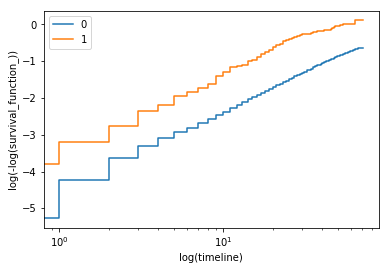

Lung - Separate Tumor Nodules - Ipsilateral Lung=No separate tumor nodules noted


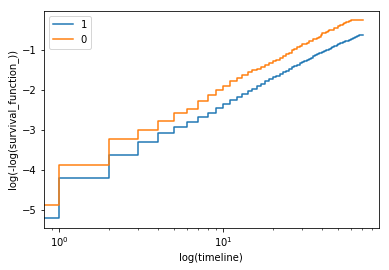

Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules, ipsilateral lung, same and different lobe (010+020)


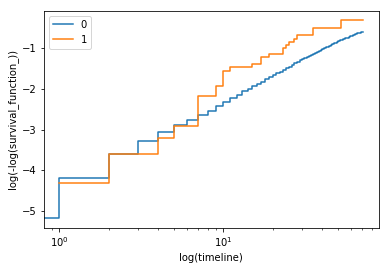

Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules in ipsilateral lung, different lobe


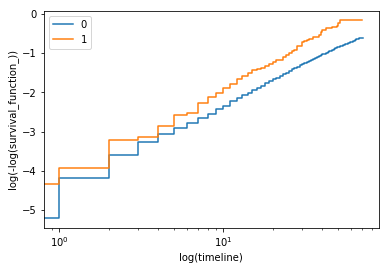

Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules in ipsilateral lung, same lobe


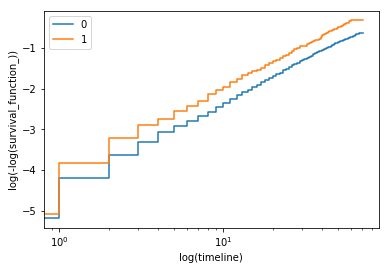

Lung - Surgery to Primary Site (1988-2015)=Lobectomy


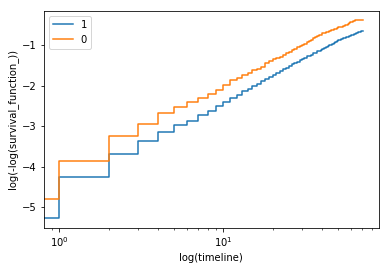

Lung - Surgery to Primary Site (1988-2015)=None


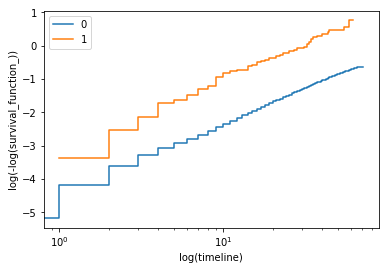

Lung - Surgery to Primary Site (1988-2015)=Sublobar


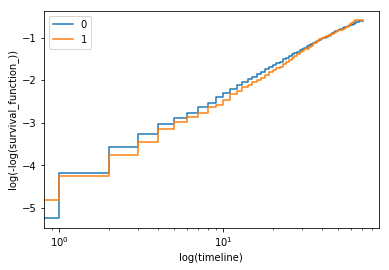

Lung - Surgery to Primary Site (1988-2015)=peumonectomy


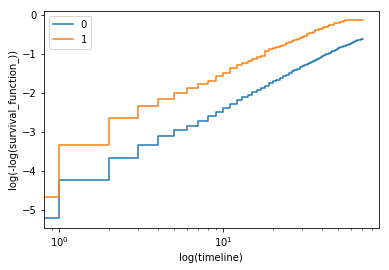

Lung - Surgery to Other Regional/Distant Sites (1998+)=None


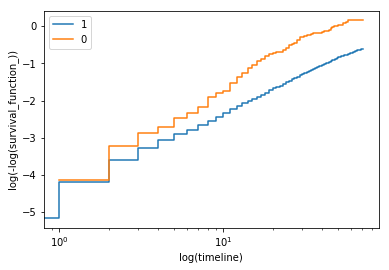

Lung - Surgery to Other Regional/Distant Sites (1998+)=Surgery To Distant Site Or Nodes


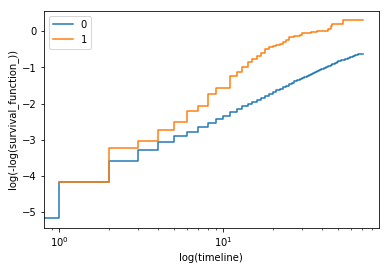

Lung - Surgery to Other Regional/Distant Sites (1998+)=Surgery To Regional Site


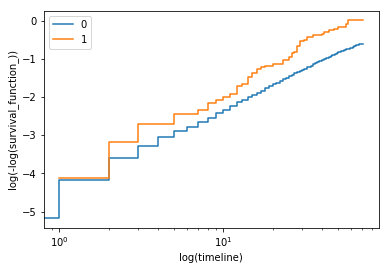

In [20]:
exclusion = ['OS', 'Survival months', 'LCCS', 'Age at diagnosis', 'CS extension (2004+)', 'CS tumor size (2004+)', 'Regional nodes examined (1988+)', 'Regional nodes positive (1988+)']
for x in filter(lambda x: x not in exclusion, df):
    print(x)
    plot_variable_loglogs(x)

In [21]:
cph_lccs.hazards_

,CS tumor size (2004+),Age at diagnosis,Primary Site=340,Primary Site=341,Primary Site=342,Primary Site=343,Primary Site=348,Primary Site=349,Grade=Moderately,Grade=Poor,...,"Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules, ipsilateral lung, same and different lobe (010+020)","Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules in ipsilateral lung, different lobe","Lung - Separate Tumor Nodules - Ipsilateral Lung=Separate tumor nodules in ipsilateral lung, same lobe",Lung - Surgery to Primary Site (1988-2015)=Lobectomy,Lung - Surgery to Primary Site (1988-2015)=None,Lung - Surgery to Primary Site (1988-2015)=Sublobar,Lung - Surgery to Primary Site (1988-2015)=peumonectomy,Lung - Surgery to Other Regional/Distant Sites (1998+)=None,Lung - Surgery to Other Regional/Distant Sites (1998+)=Surgery To Distant Site Or Nodes,Lung - Surgery to Other Regional/Distant Sites (1998+)=Surgery To Regional Site
coef,0.004334,0.022786,0.141047,-0.099657,-0.080754,0.052697,0.209548,0.206783,-3.250603,-2.951734,...,13.661904,13.574341,13.632251,3.551994,4.52354,3.52609,4.042603,-4.582963,-4.361339,-4.195594


In [22]:
cph_lccs.baseline_hazard_

,baseline hazard
event_at,
0,0.002575
1,0.005176
2,0.006008
3,0.005490
4,0.004718
5,0.003969
6,0.004170
7,0.005627
8,0.005648


In [23]:
# cph_os.plot_covariate_groups('Sex', [1, 2])
# cph_lccs.plot_covariate_groups('Sex', [1, 2])